In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm
from sklearn import mixture
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:ylabel='Density'>

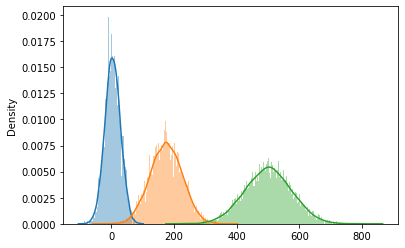

In [18]:
value1 = np.random.normal(loc=5,scale=25,size=10000)
value2 =  np.random.normal(loc=175,scale=50,size=10000)
value3 =  np.random.normal(loc=500,scale=75,size=10000)
#value4 =  np.random.normal(loc=100,scale=150,size=10000)
#value5 =  np.random.normal(loc=250,scale=79,size=10000)

#value4 =  np.random.normal(loc=1000,scale=25,size=10)
#soda = np.concatenate((value1,value2,value3,value4,value5))
soda = np.concatenate((value1,value2,value3))
sns.distplot(value1,bins=500)
sns.distplot(value2,bins=500)
sns.distplot(value3,bins=500)


<AxesSubplot:ylabel='Density'>

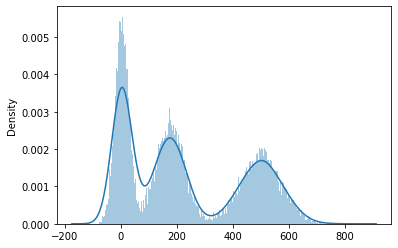

In [19]:
sns.distplot(soda,bins=500)

In [20]:
clf = mixture.GaussianMixture(n_components=3, covariance_type='full')
soda = soda.reshape(-1,1)
clf.fit(soda)
clf.covariance_type
#print(clf.covariances_)


'full'

In [21]:
clf.covariances_

array([[[2521.54664577]],

       [[5564.68398246]],

       [[ 622.66938507]]])

In [22]:
soda = soda.reshape(-1,1)

In [23]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(soda)
        bic.append(gmm.bic(soda))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

In [24]:
print('Weights:',best_gmm.weights_)
print('Means:\n',best_gmm.means_)
print(best_gmm.covariances_)
print(best_gmm.get_params())

Weights: [0.33227639 0.33339331 0.33433029]
Means:
 [[175.82723833]
 [500.82053905]
 [  5.0012155 ]]
[[2521.69675251]
 [5564.67159197]
 [ 622.63730957]]
{'covariance_type': 'diag', 'init_params': 'kmeans', 'max_iter': 100, 'means_init': None, 'n_components': 3, 'n_init': 1, 'precisions_init': None, 'random_state': None, 'reg_covar': 1e-06, 'tol': 0.001, 'verbose': 0, 'verbose_interval': 10, 'warm_start': False, 'weights_init': None}


In [32]:
var = best_gmm.covariances_
var = np.sqrt(var)
print(var,'\n',best_gmm.means_)

[[50.21649881]
 [74.59672642]
 [24.95270145]] 
 [[175.82723833]
 [500.82053905]
 [  5.0012155 ]]


<AxesSubplot:ylabel='Density'>

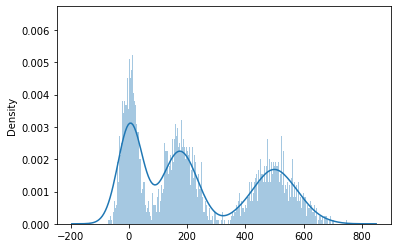

In [26]:
x,y=best_gmm.sample(10000)
sns.distplot(x,bins=1000)

<AxesSubplot:ylabel='Density'>

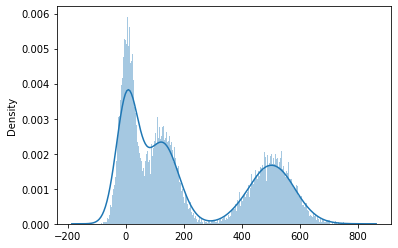

In [67]:
sns.distplot(soda,bins=500)